

*   Analyse générale du dataset : examiner la taille du dataset et détecter d’éventuelles données manquantes.
*   Analyse de la variable cible : identifier le nombre total de labels uniques ; analyser la distribution des labels et afficher un histogramme des occurrences ; établir une statégie pour gérer le déséquilibre des classes.
*  Exploration des images : charger et afficher quelques images aléatoires du dataset.
*  Analyse des descriptions textuelles : afficher quelques exemples de descriptions associées aux images, analyser la longueur moyenne des descriptions (nombre de mots), identifier les mots les plus fréquents à l’aide d’un word cloud.
* Exploration des relations entre les images, les textes et les labels : identifier d’éventuels patterns entre certains labels et leurs images/descriptions.
* Séparation des données : 70% train, 15% validation, 15% test. Utilisez uniquement le fichier «train.csv» contenant les données annotées.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chemin vers le fichier zip dans Google Drive
zip_path = '/content/drive/MyDrive/IA/projet_final/multi-label-classification-competition-2023.zip'

# Extraire le fichier zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

# Charger les fichiers CSV
train_df = pd.read_csv('/content/data/COMP5329S1A2Dataset/train.csv', sep=',', on_bad_lines='skip')

###Analyse générale du dataset : examiner la taille du dataset et détecter d’éventuelles données manquantes.

In [ ]:
train_df.head()

,ImageID,Labels,Caption
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.
1,1.jpg,1 19,A couple of men riding horses on top of a gree...
2,2.jpg,1,They are brave for riding in the jungle on tho...
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.


In [ ]:
print(train_df.shape)

(29996, 3)


In [ ]:
print("\nValeur null dans le train")
print(train_df.isnull().sum())


Valeur null dans le train
ImageID    0
Labels     0
Caption    0
dtype: int64


###Analyse de la variable cible : identifier le nombre total de labels uniques ; analyser la distribution des labels et afficher un histogramme des occurrences.

In [ ]:
train_df['Labels'].unique()

array(['1', '1 19', '8 3 13', '8 3 7', '5', '1 4', '8 3', '1 18 15',
       '1 15', '1 3', '1 13 7', '3 5', '1 3 6', '18 3', '18', '7', '9',
       '17 1', '1 6', '1 10 15', '1 2', '3 5 6 8 10', '1 5', '17', '4',
       '17 3', '3 4', '1 7', '19', '6', '1 18', '16', '1 3 14', '8 1 3',
       '9 18 1', '1 11', '10 1 2 3', '8 1', '10 7', '16 9', '1 4 5',
       '1 3 5', '1 2 3 4 6 8', '1 18 17', '17 19', '3 6', '8 1 18', '1 9',
       '9 1', '11', '8 10 3', '1 3 6 8 10', '8 5', '2 6', '3', '15',
       '1 3 4 10 18', '1 2 19 7', '8 1 3 6', '16 8 3', '8 1 5', '1 18 4',
       '8 1 4', '1 3 4 8 10', '1 7 15', '8 1 18 3', '8 1 3 15', '1 2 3',
       '1 3 13', '8 1 10 3', '3 14', '19 1 3', '2', '1 17', '8 1 3 4',
       '8 1 6 7', '3 1 2 10', '1 19 15', '18 15', '1 2 3 6 8 10', '10 3',
       '8 1 19', '1 2 9', '1 10 6', '13', '1 19 5', '1 10 3', '1 2 6',
       '1 3 4', '1 2 3 4 8', '1 3 15', '3 11', '17 15', '1 2 4', '8 3 6',
       '1 2 3 8 15', '1 10', '9 3', '10 13', '1 4 6', '8 1 3 11'

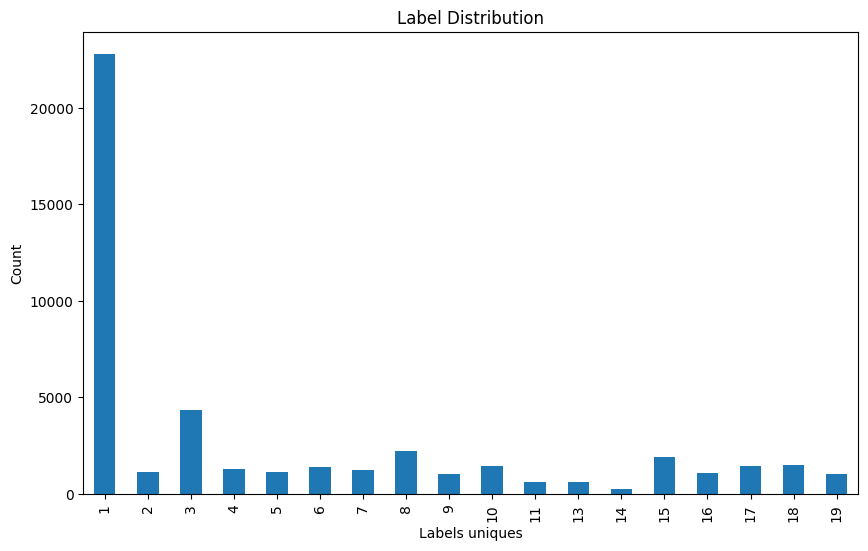

Le label 1 contient 22794 éléments.
Le label 2 contient 1164 éléments.
Le label 3 contient 4364 éléments.
Le label 4 contient 1272 éléments.
Le label 5 contient 1132 éléments.
Le label 6 contient 1395 éléments.
Le label 7 contient 1221 éléments.
Le label 8 contient 2210 éléments.
Le label 9 contient 1042 éléments.
Le label 10 contient 1470 éléments.
Le label 11 contient 603 éléments.
Le label 13 contient 605 éléments.
Le label 14 contient 252 éléments.
Le label 15 contient 1934 éléments.
Le label 16 contient 1099 éléments.
Le label 17 contient 1430 éléments.
Le label 18 contient 1525 éléments.
Le label 19 contient 1020 éléments.


In [ ]:
# Function to plot label distribution
def plot_label_distribution(df, label_column):
    # Split the labels and explode into separate rows
    labels_exploded = df[label_column.name].str.split().explode()

    labels_exploded = labels_exploded.astype(int)

    # Count the occurrences of each label
    label_counts = labels_exploded.value_counts()
    label_counts = label_counts.sort_index()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar')
    plt.title('Label Distribution')
    plt.xlabel('Labels uniques')
    plt.ylabel('Count')
    plt.show()

    # Afficher le nombre d'éléments pour chaque label
    for label, count in label_counts.items():
        print(f"Le label {label} contient {count} éléments.")

plot_label_distribution(train_df, train_df['Labels'])

*Déjà il n'y a pas de classe 12. La classe 1 est dans 22794 labels, alors que les classes sont présentes dans moins 5000 classes. les classes 11, 13 et 14 sont dans moins de 1000 labels.*

*Il y a donc un déséquilibre évident entre les classes.*

Etablir une statégie pour gérer le déséquilibre des classes.

In [ ]:
len(train_df[train_df['Labels'] == '1'])

14073

In [ ]:
len(train_df[train_df['Labels'] == '14'])

42

*Pour équilibrer les classes, on va supprimer la classe 1 dans tous les labels et les lignes qui ont pour les labels qui contiennent que la classe 1, car elle est présente dans pratiquement dans tous les labels et on va supprimer la classe 14 car elle est sous répresenter.*

**NB**: Pour les lignes supprimées nous allons aussi supprimer les images dans le dossier data.

In [ ]:
def remove_specified_class(df, label_column, class_to_remove=1):
    # Filtrer les lignes où la colonne des labels contient uniquement la classe spécifiée
    df_filtered = df[~df[label_column].str.match(rf'^{class_to_remove}$')]

    # Supprimer la classe spécifiée de tous les labels
    df_filtered[label_column] = df_filtered[label_column].apply(lambda x: ' '.join([label for label in x.split() if label != str(class_to_remove)]))

    return df_filtered


train_df_filtered = remove_specified_class(train_df, 'Labels')
print(train_df_filtered.head())

  ImageID  Labels                                            Caption
1   1.jpg      19  A couple of men riding horses on top of a gree...
3   3.jpg  8 3 13  a black and silver clock tower at an intersect...
4   4.jpg   8 3 7   A train coming to a stop on the tracks out side.
6   6.jpg       5          A big airplane flying in the big blue sky
7   7.jpg       4         A man riding a motor bike across a forest.


<ipython-input-14-6452c5823561>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[label_column] = df_filtered[label_column].apply(lambda x: ' '.join([label for label in x.split() if label != str(class_to_remove)]))


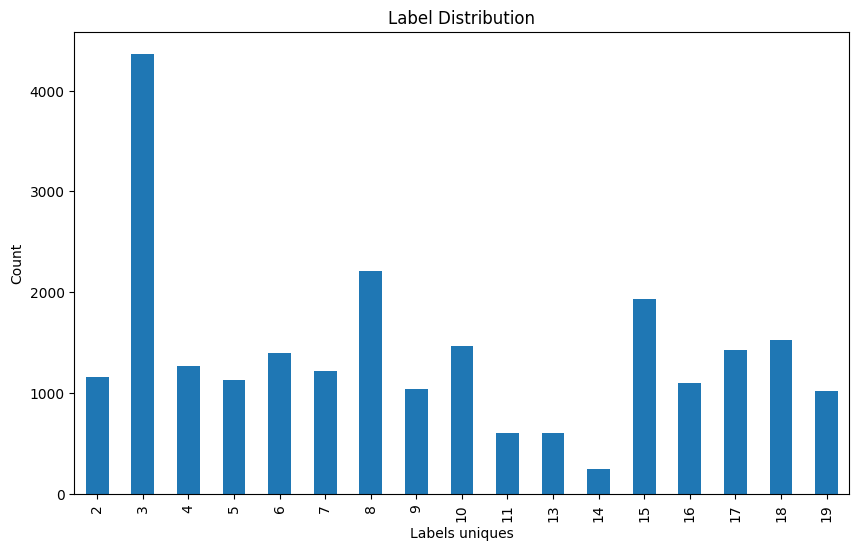

Le label 2 contient 1164 éléments.
Le label 3 contient 4364 éléments.
Le label 4 contient 1272 éléments.
Le label 5 contient 1132 éléments.
Le label 6 contient 1395 éléments.
Le label 7 contient 1221 éléments.
Le label 8 contient 2210 éléments.
Le label 9 contient 1042 éléments.
Le label 10 contient 1470 éléments.
Le label 11 contient 603 éléments.
Le label 13 contient 605 éléments.
Le label 14 contient 252 éléments.
Le label 15 contient 1934 éléments.
Le label 16 contient 1099 éléments.
Le label 17 contient 1430 éléments.
Le label 18 contient 1525 éléments.
Le label 19 contient 1020 éléments.


In [ ]:
plot_label_distribution(train_df_filtered, train_df_filtered['Labels'])

<ipython-input-14-6452c5823561>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[label_column] = df_filtered[label_column].apply(lambda x: ' '.join([label for label in x.split() if label != str(class_to_remove)]))


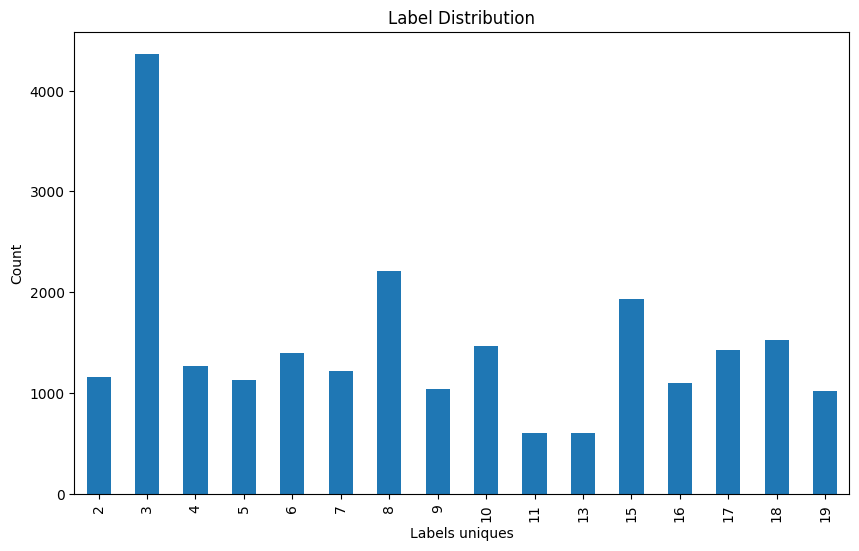

Le label 2 contient 1164 éléments.
Le label 3 contient 4364 éléments.
Le label 4 contient 1272 éléments.
Le label 5 contient 1132 éléments.
Le label 6 contient 1395 éléments.
Le label 7 contient 1221 éléments.
Le label 8 contient 2210 éléments.
Le label 9 contient 1042 éléments.
Le label 10 contient 1470 éléments.
Le label 11 contient 603 éléments.
Le label 13 contient 605 éléments.
Le label 15 contient 1934 éléments.
Le label 16 contient 1099 éléments.
Le label 17 contient 1430 éléments.
Le label 18 contient 1525 éléments.
Le label 19 contient 1020 éléments.


In [ ]:
train_df_filtered = remove_specified_class(train_df_filtered, 'Labels', 14)
plot_label_distribution(train_df_filtered, train_df_filtered['Labels'])

In [ ]:
train_df_filtered.shape

(15867, 3)

*On se retrouve avec 15867 lignes*

###Exploration des images : charger et afficher quelques images aléatoires du dataset.

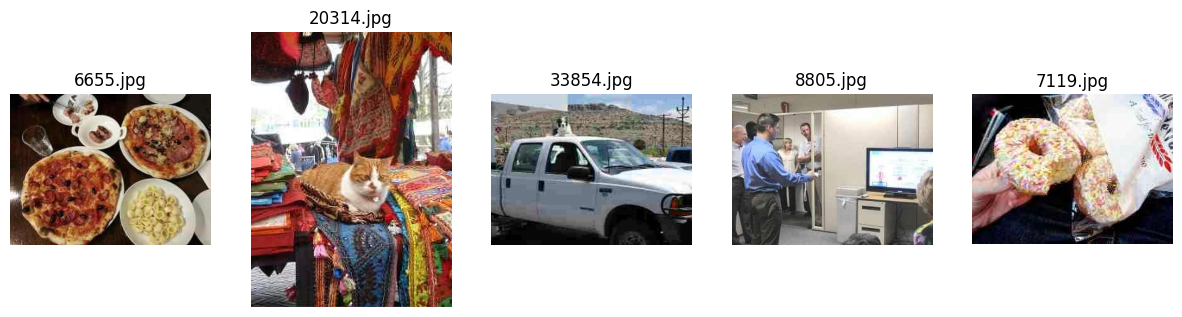

In [ ]:
import random
from PIL import Image

# Chemin vers le dossier des images
images_dir = '/content/data/COMP5329S1A2Dataset/data'

# Lister tous les fichiers d'images dans le répertoire
image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Sélectionner quelques images aléatoires à afficher
num_images_to_display = 5
random_images = random.sample(image_files, num_images_to_display)

# Afficher les images sélectionnées
plt.figure(figsize=(15, 10))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(images_dir, image_file))
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

###Analyse des descriptions textuelles : afficher quelques exemples de descriptions associées aux images, analyser la longueur moyenne des descriptions (nombre de mots), identifier les mots les plus fréquents à l’aide d’un word cloud.

In [ ]:
from wordcloud import WordCloud

#afficher quelques exemples de descriptions associées aux images
print("Exemples de descriptions associées aux images:")
print(train_df['Caption'].head())

Exemples de descriptions associées aux images:
0     Woman in swim suit holding parasol on sunny day.
1    A couple of men riding horses on top of a gree...
2    They are brave for riding in the jungle on tho...
3    a black and silver clock tower at an intersect...
4     A train coming to a stop on the tracks out side.
Name: Caption, dtype: object


In [ ]:
# Analyser la longueur moyenne des descriptions (nombre de mots)
train_df['description_length'] = train_df['Caption'].apply(lambda x: len(x.split()))
average_description_length = train_df['description_length'].mean()
print(f"\nLongueur moyenne des descriptions: {average_description_length:.2f} mots")


Longueur moyenne des descriptions: 10.49 mots


In [ ]:
train_df.head()

,ImageID,Labels,Caption,description_length
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.,9
1,1.jpg,1 19,A couple of men riding horses on top of a gree...,12
2,2.jpg,1,They are brave for riding in the jungle on tho...,11
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...,12
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.,11


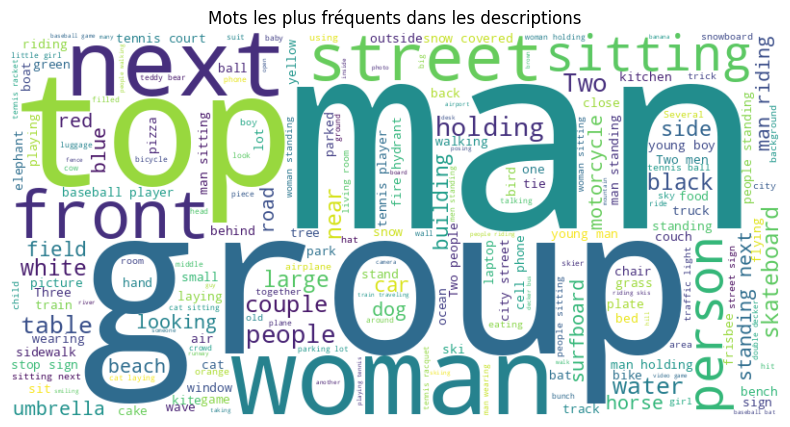

In [ ]:
#identifier les mots les plus fréquents à l’aide d’un word cloud.
all_descriptions = ' '.join(train_df['Caption'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Afficher le word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Mots les plus fréquents dans les descriptions')
plt.axis('off')
plt.show()

###Exploration des relations entre les images, les textes et les labels : identifier d’éventuels patterns entre certains labels et leurs images/descriptions.

Labels: 1 4
Description: A man riding a motor bike across a forest.


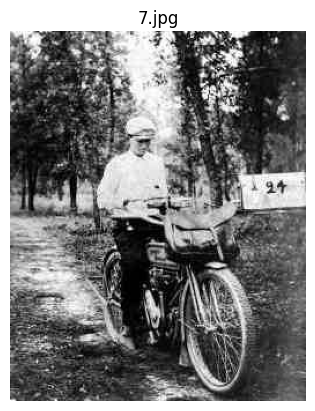

Labels: 1 4
Description: Man on dirt bike with a redheaded woman in his lap.


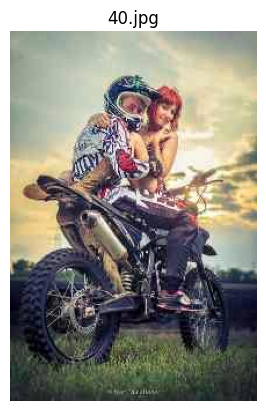

Labels: 4
Description: Rusted red motorcycle parked beside a red building.


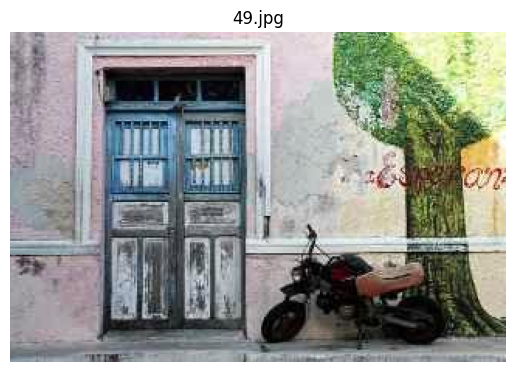

Labels: 3 4
Description: A motorcycle parked in a parking spot in a lot.


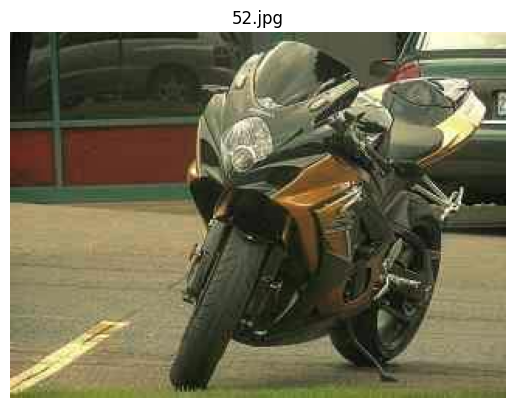

Labels: 1 4
Description: A person is riding a motorcycle down a country road.


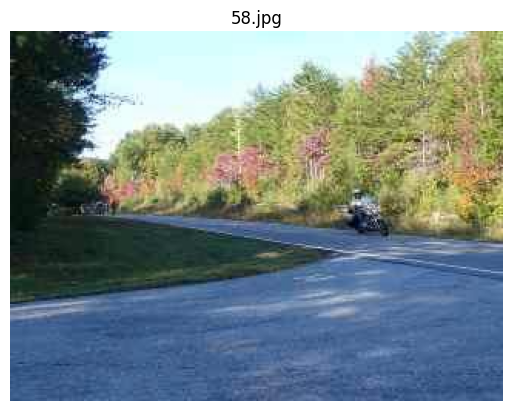

Labels: 1 4
Description: A motorcycle is parked outside of a cafe.


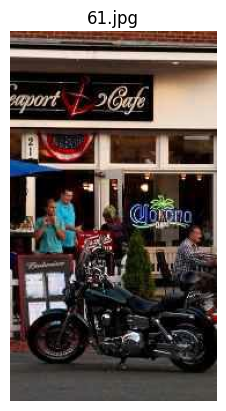

Labels: 1 3 14
Description: A black and white photograph of two men on side of the road.


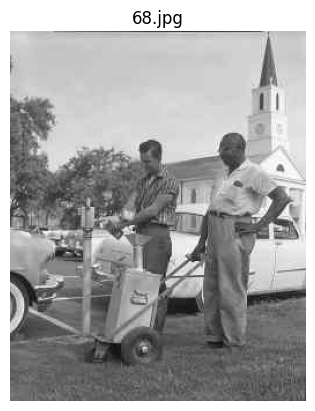

Labels: 1 4 5
Description: An airplane flying through the air over a motorcycle.


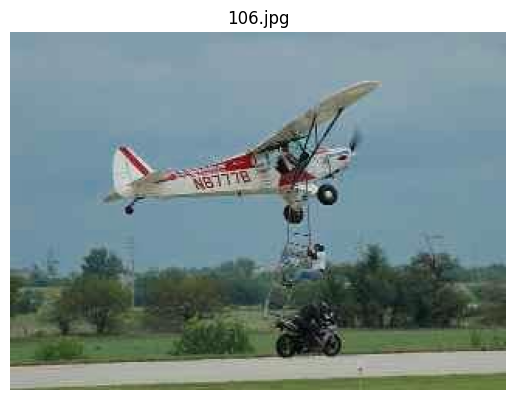

Labels: 1 2 3 4 6 8
Description: A beautiful young woman riding on the back of a motorcycle.


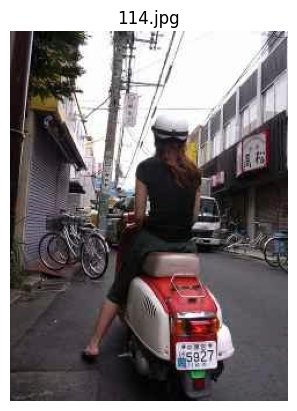

Labels: 1 3 4 10 18
Description: A man riding a red motorcycle down a street with a dog on back of it.


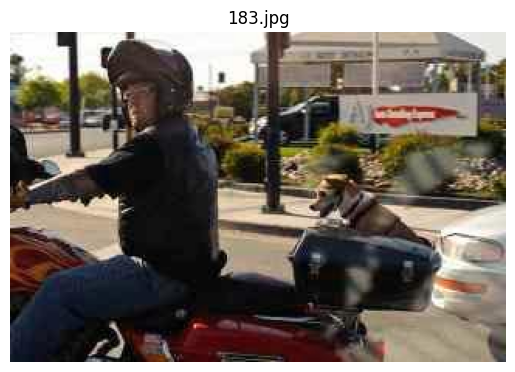

In [ ]:
def display_elements_with_label(df, images_dir, num_elements=10):
  """
  Affiche les éléments (label, description, image) contenant le label 4.

  Args:
    df: DataFrame contenant les données.
    images_dir: Chemin du dossier contenant les images.
    num_elements: Nombre d'éléments à afficher.
  """
  df_label = df[df['Labels'].str.contains('4')]

  if len(df_label) < num_elements:
    num_elements = len(df_label)

  for index, row in df_label.head(num_elements).iterrows():
    image_path = os.path.join(images_dir, row['ImageID'])

    print(f"Labels: {row['Labels']}")
    print(f"Description: {row['Caption']}")
    try:
      img = Image.open(image_path)
      plt.imshow(img)
      plt.title(row['ImageID'])
      plt.axis('off')
      plt.show()
    except FileNotFoundError:
      print(f"Image {image_path} not found")

#Label 1
display_elements_with_label(train_df, images_dir)


*Cette observation suggère que le label 4 est lié à la catégorie "moto" et que le label 1 est lié à la catégorie "personne".*

###Séparation des données : 70% train, 15% validation, 15% test.

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Séparer les données en ensembles de train, validation et test (70% train, 15% validation, 15% test)
train_data, temp_data = train_test_split(train_df_filtered, test_size=0.30, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

In [ ]:
# Sauvegarder les données séparées dans des fichiers CSV dans Google Drive
train_data.to_csv('/content/drive/MyDrive/IA/projet_final/train_split.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/IA/projet_final/val_split.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/IA/projet_final/test_split.csv', index=False)

In [ ]:
test_data

,ImageID,Labels,Caption
327,327.jpg,3,An elephant standing on a grass covered field
18274,18277.jpg,10 2 3,People pulling suitcases while walking down th...
25771,25774.jpg,8 9,A boat docked next to pier in a city.
16581,16583.jpg,17,A white and orange kitten snuggles under a blu...
9551,9553.jpg,17,Black and white cat with black nose laying on ...
...,...,...,...
13258,13260.jpg,18,A half eaten cake sitting on top of a plate ne...
7856,7856.jpg,17,A cat laying on its arm looking at a mirror.
23163,23166.jpg,18,A dog on the floor of a dirty bathroom.
15166,15168.jpg,17,A house cat walking by a mirror in a house.


In [ ]:
# Créer des répertoires pour les images de train, validation et test dans Google Drive
os.makedirs('/content/drive/MyDrive/IA/projet_final/train_images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/IA/projet_final/val_images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/IA/projet_final/test_images', exist_ok=True)

In [ ]:
# Fonction pour copier les images dans les répertoires respectifs
def copy_images(df, dest_dir):
    for image_id in df['ImageID']:
        image_path = os.path.join(images_dir, image_id)
        if os.path.exists(image_path):
            shutil.copy(image_path, dest_dir)

# Copier les images dans les répertoires respectifs
copy_images(train_data, '/content/drive/MyDrive/IA/projet_final/train_images')
copy_images(val_data, '/content/drive/MyDrive/IA/projet_final/val_images')
copy_images(test_data, '/content/drive/MyDrive/IA/projet_final/test_images')

print("Séparation des données et copie des images réussies.")

Séparation des données et copie des images réussies.
